## 练习2-4
创建一个440Hz，时长0.01秒的三角波信号，绘制其波形和频谱，找到频率为零的元素，这个元素的幅值和相位是多少？如果设定零频率的幅值为100，对波形的影响是什么？

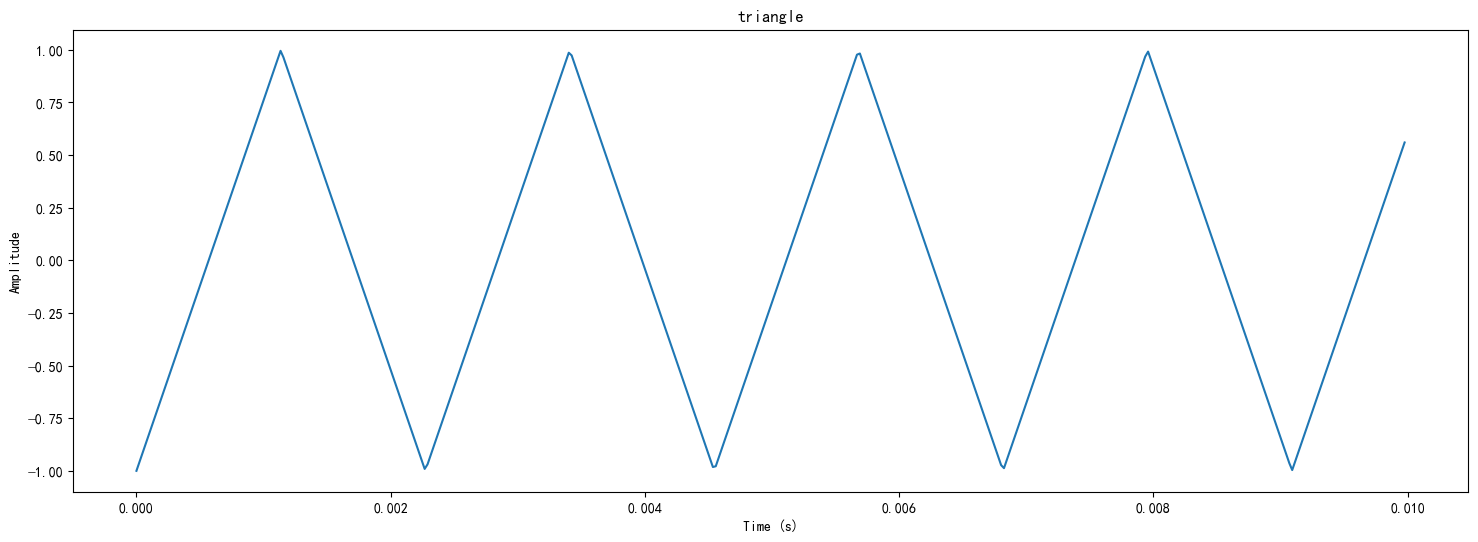

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei","Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 三角波信号
duration = 0.01       # 信号持续时间（秒）
sample_rate = 44100 # 采样率（Hz）
base_freq = 440      # 频率
amplitude = 1      # 振幅

# 生成时间序列
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
# 生成信号
tri_signal = amplitude * signal.sawtooth(2*np.pi*base_freq*t, 0.5)

plt.figure(figsize=(18, 6))
plt.plot(t, tri_signal)
plt.title('triangle')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

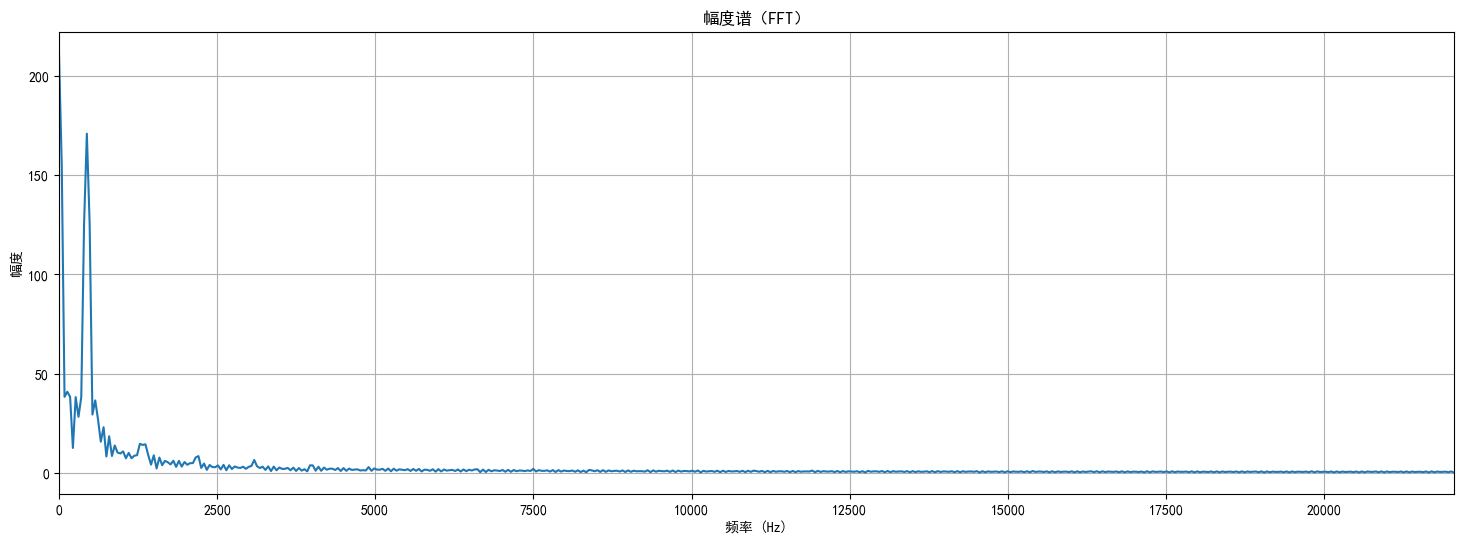

In [2]:
# 频谱
n_fft = 1000 # FFT窗口大小
tri_spec = np.fft.rfft(tri_signal+0.5, n=n_fft)  # 加直流偏离，对应频谱上f=0的值
amplitude = np.abs(tri_spec)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1/sample_rate)  # 频率轴

# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sample_rate/2)
plt.show()

零频分量是信号幅度的总和，即直流偏置；对一个n点的周期信号，若零频分量等于hs0，那么信号整体的偏置offset = hs0/n